In [1]:
"""C 2023 Matthew C. Digman
code example to make a gap in white noise"""

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

import numpy as np

import matplotlib.pyplot as plt

import WDMWaveletTransforms.wavelet_transforms as wt

np.random.seed(314)


using mkl fft


In [2]:
# Define the wavelet transform parameters
Nt = 128                  # number of time pixels
Nf = 256                  # number of frequency pixels
dt = 60.                  # spacing of samples in time domain

ND = Nt*Nf                # total number of pixels
DT = dt*Nf                # width of time pixels
DF = 1./(2*dt*Nf)         # width of frequency pixels

SECSYEAR = (24*365*3600)  # Number of seconds in a calendar year

Tobs = dt*ND              # total observing time in seconds
TobsYr = Tobs/SECSYEAR    # total observing time in years

In [3]:
# define the noise models
# time domain noise model
inv_chol_noise_time = np.zeros(ND)+1.
# wavelet domain noise model
inv_chol_noise_wavelet = np.zeros((Nt, Nf))+1.

In [4]:
# generate the noise 
# noise generated intrinsically in time domain
noise_time = np.random.normal(0., 1., ND)*inv_chol_noise_time

# drop out part of signal
noise_time_mask = noise_time.copy()
nt_gap_start = 3*ND//8
nt_gap_end = nt_gap_start+np.int64(2*3600/dt)
noise_time_mask[nt_gap_start:nt_gap_end] = 0.

# get the full noise signal in the wavelet domain using time domain transform
noise_wavelet = wt.transform_wavelet_time(noise_time, Nf, Nt, mult=8)

# get the masked noise signal in the wavelet domain using time domain transform
noise_wavelet_mask = wt.transform_wavelet_time(noise_time_mask, Nf, Nt, mult=8)

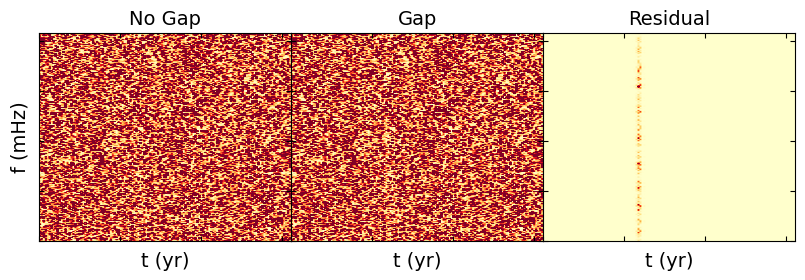

In [5]:
# plot the spectra
fig, ax = plt.subplots(1, 3, figsize=(8.4, 2.85))
fig.subplots_adjust(wspace=0., hspace=0., left=0.05, top=0.91, right=0.95, bottom=0.18)

aspect = 'auto'

im = ax[0].imshow(np.rot90((noise_wavelet**2)), extent=[0, TobsYr, 0., Nf*DF], cmap='YlOrRd', vmin=0, vmax=1, aspect=aspect)

ax[0].set_title(r"No Gap", fontsize=14)
ax[0].set_ylabel('f (mHz)', fontsize=14)
ax[0].set_xlabel('t (yr)', fontsize=14)
ax[0].tick_params(axis='both', direction='in', which='both', top=True, right=True)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

im = ax[1].imshow(np.rot90((noise_wavelet_mask**2)), extent=[0, TobsYr, 0., Nf*DF], cmap='YlOrRd', vmin=0, vmax=1, aspect=aspect)

ax[1].set_title(r"Gap", fontsize=14)
ax[1].set_xlabel('t (yr)', fontsize=14)
ax[1].tick_params(axis='both', direction='in', which='both', top=True, right=True)
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

im = ax[2].imshow(np.rot90(((noise_wavelet_mask-noise_wavelet)**2)), extent=[0, TobsYr, 0., Nf*DF], cmap='YlOrRd', vmin=0, vmax=1, aspect=aspect)

ax[2].set_title(r"Residual", fontsize=14)
ax[2].set_xlabel('t (yr)', fontsize=14)
ax[2].tick_params(axis='both', direction='in', which='both', top=True, right=True)
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])

plt.show()